<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Buscador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Buscador

## Motivação

Um buscador é uma ferramenta que, a partir de uma consulta (query), retorna um conjunto de informações relevantes extraídas de uma base de dados. Diversos tipos de aplicações utilizam buscadores: navegadores, aplicativos de mensagens, plataformas de música, sites de compras, bibliotecas digitais, entre outros. Cada um desses buscadores é projetado para otimizar a experiência do usuário, permitindo o acesso rápido e eficiente às informações desejadas.

A importância econômica dos buscadores é inegável. Quando um website aparece entre os primeiros resultados de um buscador web, a qualidade do tráfego recebido aumenta significativamente, o que, por sua vez, aumenta o retorno sobre investimento (ROI) dos negócios. [CITAR ARTIGO Search Engine Optimization ].


Dada a onipresença dos buscadores em diversas aplicações, entender seu funcionamento é crucial. Eles não só facilitam o acesso à informação, mas também têm um impacto direto na visibilidade e lucratividade das empresas. A presença constante dos buscadores no mundo digital é tão significativa que eles possuem um ícone universalmente reconhecido: a famosa lupa, que simboliza a busca e descoberta de informações.

## Fundamentação teórica

Os buscadores são ferramentas que, a partir de uma consulta (query), retornam informações relevantes de uma base de dados previamente indexada. Atualmente, existem diversos mecanismos de busca, desenvolvidos com diferentes lógicas de implementação. A importância dos documentos retornados pode ser calculada de várias maneiras, e buscadores como o Google permitem o impulsionamento de links patrocinados. Neste laboratório, será demonstrada a criação de um buscador para bases de dados textuais com uma lógica de indexação puramente acadêmica e não comercial.

A primeira etapa do buscador consiste do pré processamento da query de entrada, que corresponde ao conteúdo sobre o qual se deseja obter informações. Dessa forma, o objetivo do buscador é retornar documentos que contenham informações significativas para a query fornecida. O pré-processamento da query é essencial, pois ajuda a reduzir a quantidade de termos a serem pesquisados, ao passo que maximiza o valor informacional dos termos a serem pesquisados. Por isso, essa etapa contribui para a eficiência do processo de busca. Os detalhes sobre a importância do pré-processamento foram discutidos em roteiros passados.

Após o pré processamento da query, é gerado um índice de palavras por documento. Esse índice funciona da seguinte forma: para cada palavra i presente na base de textos, o índice retorna o conjunto de documentos d_i onde a palavra i aparece, bem como a quantidade de vezes q_i que essa palavra i ocorre em cada documento d_i.  Para um melhor entendimento, observe a figura tal:

Com a base de dados indexada, já é possível realizar consultar na base, porém essa consulta ainda não é informativa o suficiente, uma vez que o índice de palavras por documento retorna todos os documentos em que determinada palavra aparece. Considerando que uma consulta costuma apresentar mais de uma palavra, o retorno do índice seria ainda maior. Por isso, é necessário realizar um cálculo de importância dos documentos. Essa etapa diferente de buscador para buscador. Neste laboratório, será realizada da seguinte forma: Para cada palavra *i* da query e para cada documento *d_i*, será somado a quantidade de ocorrência *q_i*.

Por exemplo, dado a query: "Films to watch with the family"
Query pré processada : "film watch famili"

Busca :

'film' : {'doc1': 4, 'doc2': 3, 'doc3': 4 },

'watch': {'doc1': 3, 'doc5': 1  } ,

'famili': { doc2': 1, 'doc3': 2 , doc4 : 1, doc5 : 1  , doc6 : 1 , doc7 : 1}

Nesse exemplo, o cálculo da importância dos documentos seria :

* doc1: 4 (film) + 3 (watch) = 7
* doc2: 3 (film) + 1 (famili) = 4
* doc3: 4 (film) + 2 (famili) = 6
* doc4: 1 (famili) = 1
* doc5: 1 (watch) + 1 (famili) = 2
* doc6: 1 (famili) = 1
* doc7: 1 (famili) = 1


Após esse cálculo, é feita a ordenação pela frequência total de cada documento retornado na busca :

{ 'doc1': 7,'doc3': 6, 'doc2': 4, 'doc5': 2, 'doc4': 1, 'doc6': 1, 'doc7': 1 }

Em seguida, define-se a quantidade N de documentos a ser retornada, e a lista é reduzida conforme essa quantidade. O cálculo da importância dos documentos e a redução dos documentos a serem retornados é muito importante, pois o usário ao utilizar um buscador possui um limite de tempo ao procurar informações. Por mais que o consumo de todos os doscumentos da base que contenham os termos da busca  talvez trouxesse toda a informação que o usuário busca, raramente esse consumo ocorre. Considerando que atualmente, as bases de dados costumam crescer cada vez, realizar essas duas etapas no buscador é essencial.

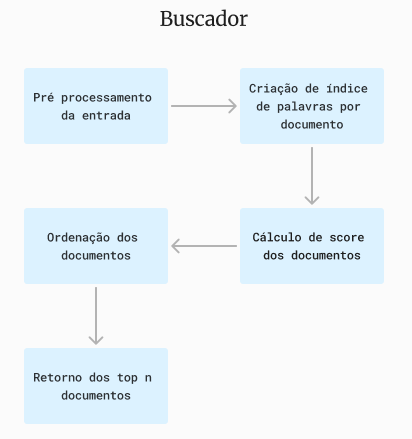

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/buscador.png" -O buscador.png
display(Image("buscador.png", width=400))


## Resultados esperados

É esperado que nesse laboratório, o aluno comprrenda o funcionamento de um buscador e que consiga implementar um na prática.

## Código

### índice de palavras por documento

## Referências

https://d1wqtxts1xzle7.cloudfront.net/66254313/search_engine_optimization_IJERTV2IS110872-libre.pdf?1618306716=&response-content-disposition=inline%3B+filename%3DIJERT_Search_Engine_Optimization.pdf&Expires=1724440072&Signature=hNatEk-4hLaTpmnPBnak5sXAktKf~cay~lu5A3OMfpyqxTJtwv2TKhBdLh3e--KLDCTdNdC~lWNpvkqn2TjZsZCtR9WoJB3~SZMK~rXChADNOmG0sU--ELj817nSW~~QbBP~65tbTs3Za7XfxCmRtCw4o4u0rURfXPyjcsprLaOZOtIy-8nj~YjPFtAvEaTHY6YNky1FbAFSWM6MJcG~UdKpnANMCS3vm1ILVy7KULXCsvTv4Q5-osBHPkoPOvZfXgSqLn4cfY7O6jmIPF~nL2~dZ73d9JzITSvzd~CkvK5k8xduCNTA~p~fP~97hz81S9RGj8GuT8aNJt9THr4fnQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA